In [3]:
!pip install opencv-python-headless fer

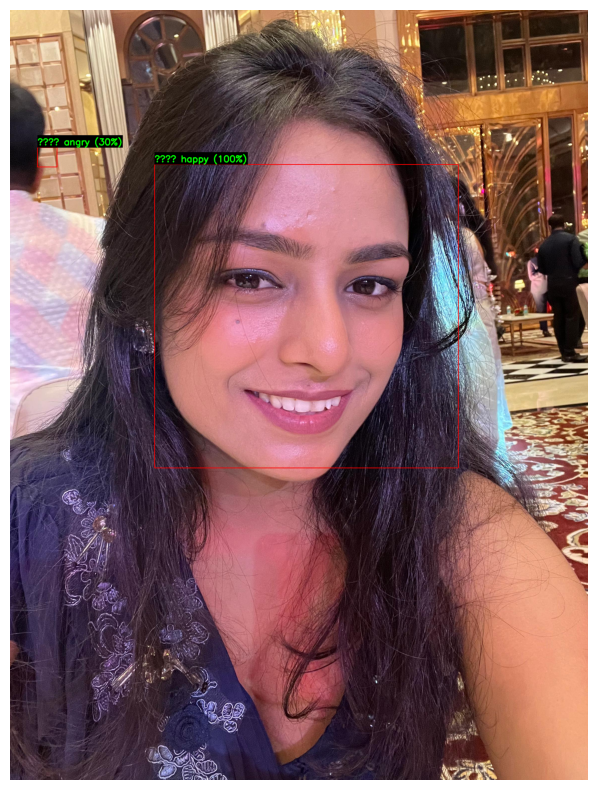

In [9]:
import cv2
from fer import FER
import matplotlib.pyplot as plt

# Initialize detectors
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
detector = FER()

# Replace with your image path
img_path = '/content/WhatsApp Image 2025-07-05 at 17.34.51.jpeg'

# Load the image
image = cv2.imread(img_path)

if image is None:
    print("Error loading image. Check the file path.")
else:
    # Convert BGR to RGB for display and FER
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Detect faces
    faces = face_cascade.detectMultiScale(gray, scaleFactor=1.3, minNeighbors=5)

    emoji_map = {
        "happy": "😊",
        "sad": "😞",
        "angry": "😡",
        "surprise": "😲",
        "fear": "😨",
        "disgust": "🤢",
        "neutral": "😐"
    }

    for (x, y, w, h) in faces:
        face_img = image_rgb[y:y+h, x:x+w]

        emotion_data = detector.top_emotion(face_img)
        if emotion_data:
            emotion, score = emotion_data
        else:
            emotion, score = "neutral", 0

        label = f"{emoji_map.get(emotion, '')} {emotion} ({int(score * 100)}%)"

        # Draw rectangle around face
        cv2.rectangle(image_rgb, (x, y), (x + w, y + h), (255, 0, 0), 2)

        # Prepare text settings
        font = cv2.FONT_HERSHEY_SIMPLEX
        font_scale = 1.2  # Larger font size
        thickness = 3

        # Get text size
        (text_width, text_height), baseline = cv2.getTextSize(label, font, font_scale, thickness)

        # Draw filled rectangle for text background
        cv2.rectangle(
            image_rgb,
            (x, y - text_height - baseline - 10),
            (x + text_width, y),
            (0, 0, 0),  # Black background
            thickness=cv2.FILLED
        )

        # Put the emotion label text
        cv2.putText(
            image_rgb,
            label,
            (x, y - 10),
            font,
            font_scale,
            (0, 255, 0),  # Bright green color
            thickness
        )

    # Show final image with detections
    plt.figure(figsize=(12, 10))
    plt.imshow(image_rgb)
    plt.axis('off')
    plt.show()
